# 월간 아파트 매매가격 지수 증감률

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('../data/added_features/월간 아파트 매매가격지수증감률_20240715.xlsx')

In [3]:
df.head()

,지역명,1986-01-01 09:00:52,1986-02-01 09:00:52,1986-03-01 09:00:52,1986-04-01 09:00:52,1986-05-01 09:00:52,1986-06-01 09:00:52,1986-07-01 09:00:52,1986-08-01 09:00:52,1986-09-01 09:00:52,...,2023-09-01 09:00:52,2023-10-01 09:00:52,2023-11-01 09:00:52,2023-12-01 09:00:52,2024-01-01 09:00:52,2024-02-01 09:00:52,2024-03-01 09:00:52,2024-04-01 09:00:52,2024-05-01 09:00:52,2024-06-01 09:00:52
0,전국,-,0,-0.18416,-0.553507,-0.742115,-0.560743,-0.563911,-0.189034,0.189392,...,0.085081,0.092494,0.006013,-0.107657,-0.155324,-0.108795,-0.161037,-0.216532,-0.129798,-0.094897
1,서울,-,0.173309,-0.173009,-0.693242,-0.523563,-1.05263,-0.354615,0,0.177942,...,0.264893,0.23083,0.03803,-0.105707,-0.192186,-0.120464,-0.148568,-0.165737,-0.031238,0.124007
2,강북14개구,-,-0.163935,-0.164204,-0.657897,-1.324502,0,0,0,0.335571,...,0.069267,0.092069,-0.052676,-0.146933,-0.196784,-0.145829,-0.170348,-0.223636,-0.091976,0.095237
3,종로구,-,-,-,-,-,-,-,-,-,...,0.21528,0.153562,0.160123,0.016179,-0.092944,-0.028533,-0.148421,0.060408,-0.090945,0.266376
4,중구,-,-,-,-,-,-,-,-,-,...,0.015108,0.131441,0.016584,0.165457,0.119201,-0.092397,0.052829,-0.233889,-0.059695,0.344978


In [4]:
cols = df.columns
cols = [int(str(col)[:10].replace('-', '')[:6]) for col in cols[1:]]

In [5]:
cols.insert(0, '지역명')
cols

['지역명',
 198601,
 198602,
 198603,
 198604,
 198605,
 198606,
 198607,
 198608,
 198609,
 198610,
 198611,
 198612,
 198701,
 198702,
 198703,
 198704,
 198705,
 198706,
 198707,
 198708,
 198709,
 198710,
 198711,
 198712,
 198801,
 198802,
 198803,
 198804,
 198805,
 198806,
 198807,
 198808,
 198809,
 198810,
 198811,
 198812,
 198901,
 198902,
 198903,
 198904,
 198905,
 198906,
 198907,
 198908,
 198909,
 198910,
 198911,
 198912,
 199001,
 199002,
 199003,
 199004,
 199005,
 199006,
 199007,
 199008,
 199009,
 199010,
 199011,
 199012,
 199101,
 199102,
 199103,
 199104,
 199105,
 199106,
 199107,
 199108,
 199109,
 199110,
 199111,
 199112,
 199201,
 199202,
 199203,
 199204,
 199205,
 199206,
 199207,
 199208,
 199209,
 199210,
 199211,
 199212,
 199301,
 199302,
 199303,
 199304,
 199305,
 199306,
 199307,
 199308,
 199309,
 199310,
 199311,
 199312,
 199401,
 199402,
 199403,
 199404,
 199405,
 199406,
 199407,
 199408,
 199409,
 199410,
 199411,
 199412,
 199501,
 199502,
 1

In [6]:
df.columns = cols

In [7]:
df

,지역명,198601,198602,198603,198604,198605,198606,198607,198608,198609,...,202309,202310,202311,202312,202401,202402,202403,202404,202405,202406
0,전국,-,0,-0.18416,-0.553507,-0.742115,-0.560743,-0.563911,-0.189034,0.189392,...,0.085081,0.092494,0.006013,-0.107657,-0.155324,-0.108795,-0.161037,-0.216532,-0.129798,-0.094897
1,서울,-,0.173309,-0.173009,-0.693242,-0.523563,-1.05263,-0.354615,0,0.177942,...,0.264893,0.23083,0.03803,-0.105707,-0.192186,-0.120464,-0.148568,-0.165737,-0.031238,0.124007
2,강북14개구,-,-0.163935,-0.164204,-0.657897,-1.324502,0,0,0,0.335571,...,0.069267,0.092069,-0.052676,-0.146933,-0.196784,-0.145829,-0.170348,-0.223636,-0.091976,0.095237
3,종로구,-,-,-,-,-,-,-,-,-,...,0.21528,0.153562,0.160123,0.016179,-0.092944,-0.028533,-0.148421,0.060408,-0.090945,0.266376
4,중구,-,-,-,-,-,-,-,-,-,...,0.015108,0.131441,0.016584,0.165457,0.119201,-0.092397,0.052829,-0.233889,-0.059695,0.344978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,무주군,-,-,-,-,-,-,-,-,-,...,0,0.392157,0,0,0,-2.039215,-1.827310,0.000000,0.000000,0.000000
274,임실군,-,-,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,-1.635999
275,순창군,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,0.000000,0.000000,0.000000,0.000000
276,고창군,-,-,-,-,-,-,-,-,-,...,0.147447,0,0.078165,0.0334,0.037779,-0.038046,1.479138,1.739410,0.521282,0.384456


In [8]:
origin_df = pd.read_csv('../data/preprocessed/18_trading_activity.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_20611/2801679316.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_df = pd.read_csv('../data/preprocessed/18_trading_activity.csv')


In [9]:
district_list = origin_df['구'].unique().tolist()
print(len(district_list))
district_list

25


['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

### 구별로 데이터 프레임을 따로 추출한다.

In [10]:
df_list = []

for district in district_list:
    df_list.append(df[df['지역명']==district])

In [11]:
for i in range(25):
    tmp = df_list[i].drop(['지역명'], axis=1)
    tmp = pd.DataFrame(tmp.iloc[0])
    tmp.reset_index(inplace=True)
    tmp.columns = ['년도월', '매매가격 지수 증감률']
    df_list[i] = tmp

In [12]:
for i in range(25):
    df_list[i] = df_list[i].iloc[252:].reset_index(drop=True)

In [13]:
df_list[0]

,년도월,매매가격 지수 증감률
0,200701,0.834969
1,200702,-0.155724
2,200703,-0.187928
3,200704,-0.868107
4,200705,-0.724114
...,...,...
205,202402,-0.020994
206,202403,-0.078872
207,202404,0.00091
208,202405,0.119459


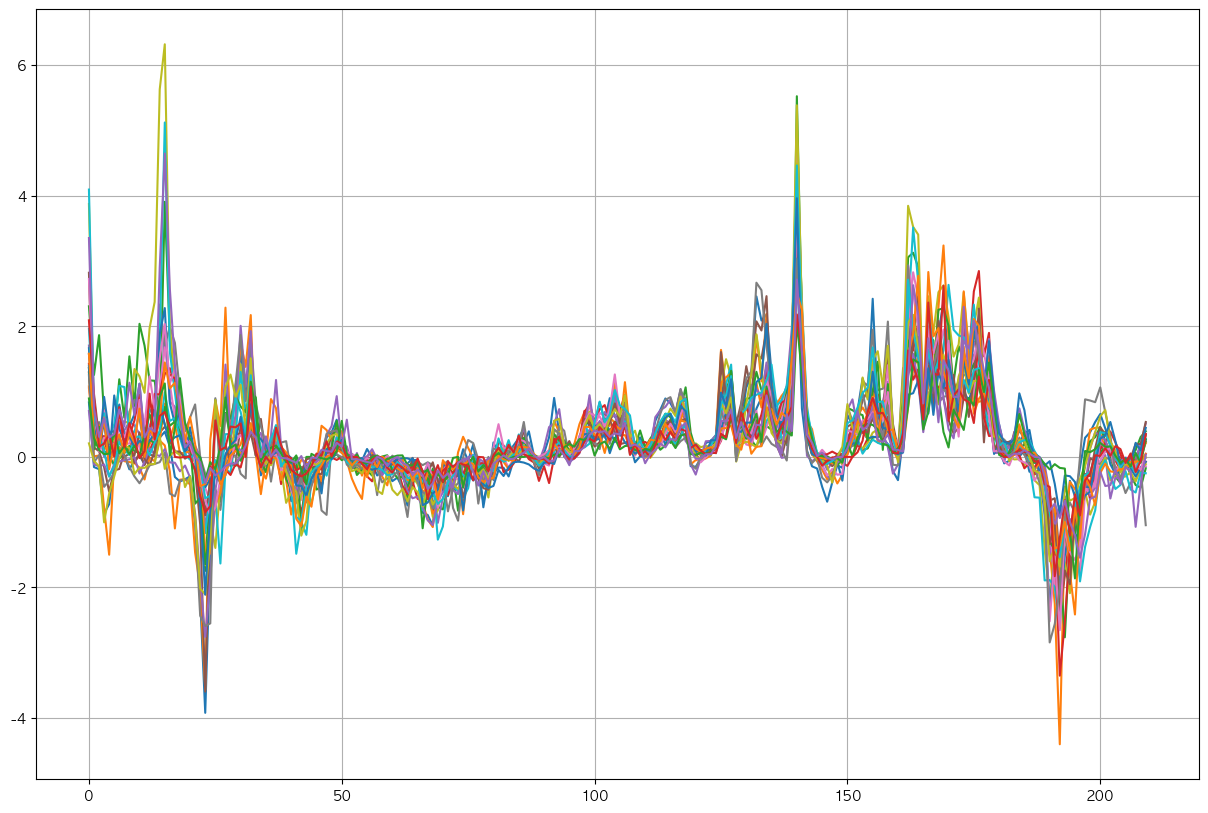

In [14]:
plt.figure(figsize=(15, 10))
for i in range(25):
    df_list[i]['매매가격 지수 증감률'].plot()
plt.grid(True)

# 원본에 적용

In [15]:
origin_df_split_list = []

for district in district_list:
    origin_df_split_list.append(origin_df[origin_df['구'] == district])

In [16]:
origin_df_split_list[0]

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,건설사 랭킹,구,동,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,2.0,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,2.0,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123928,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,12,7,2021,...,1.0,강남구,일원동,98.962,1.168175e+07,46.0,2,0,45.056635,13.703570
1123929,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,19,6,2021,...,1.0,강남구,일원동,98.962,1.168175e+07,46.0,2,0,45.056635,13.703570
1123930,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,31,9,2021,...,1.0,강남구,일원동,98.962,1.168175e+07,46.0,2,0,45.056635,13.703570
1123931,서울특별시 강남구 일원동,734,734.0,0.0,상록수,74.54,202307,7,3,1993,...,1.0,강남구,일원동,98.705,1.168175e+07,38.0,30,1,45.212818,12.462049


In [17]:
def mapping(one_of_df, one_of_origin_df):
    mapping_ = pd.Series({ym: value for ym, value in zip(one_of_df['년도월'], one_of_df['매매가격 지수 증감률'])})

    one_of_origin_df['매매가격 지수 증감률'] = np.nan
    one_of_origin_df['매매가격 지수 증감률'] = one_of_origin_df['매매가격 지수 증감률'].fillna(one_of_origin_df['계약년월']).map(mapping_)

    return one_of_origin_df

In [18]:
for i in range(25):
    origin_df_split_list[i] = mapping(df_list[i], origin_df_split_list[i])

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_20611/2043647475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_of_origin_df['매매가격 지수 증감률'] = np.nan
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_20611/2043647475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_of_origin_df['매매가격 지수 증감률'] = one_of_origin_df['매매가격 지수 증감률'].fillna(one_of_origin_df['계약년월']).map(mapping_)
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_20611/2043647475.py:4: SettingWithCopyWarni

In [19]:
origin_df_split_list[0]

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,구,동,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123928,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,12,7,2021,...,강남구,일원동,98.962,1.168175e+07,46.0,2,0,45.056635,13.703570,0.535049
1123929,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,19,6,2021,...,강남구,일원동,98.962,1.168175e+07,46.0,2,0,45.056635,13.703570,0.535049
1123930,서울특별시 강남구 일원동,742,742.0,0.0,디에이치포레센트,84.94,202308,31,9,2021,...,강남구,일원동,98.962,1.168175e+07,46.0,2,0,45.056635,13.703570,0.535049
1123931,서울특별시 강남구 일원동,734,734.0,0.0,상록수,74.54,202307,7,3,1993,...,강남구,일원동,98.705,1.168175e+07,38.0,30,1,45.212818,12.462049,0.378731


In [20]:
origin_df = pd.concat([one_of_origin_df for one_of_origin_df in origin_df_split_list]).sort_index()

In [21]:
origin_df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,구,동,구별 지가지수,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,강남구,개포동,75.121,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,강남구,개포동,75.461,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,중랑구,신내동,99.019,2.963517e+06,38.0,9,0,45.212818,12.462049,-0.641286
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,중랑구,신내동,99.019,2.963517e+06,38.0,9,0,45.212818,12.462049,-0.641286
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,중랑구,신내동,99.123,2.963517e+06,46.0,9,0,45.056635,13.703570,-0.607676
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,중랑구,신내동,99.328,2.963517e+06,41.4,9,0,44.744578,17.287617,-0.225827


In [100]:
origin_df.to_csv('../data/preprocessed/19_rate_trading_price.csv', index=False)